<a href="https://colab.research.google.com/github/kenneth-craig/academyPub/blob/main/ML_Chapter20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation
**Chapter 20 How to Make Distribution More Gaussian**

In [2]:
#upload sonar.csv file from local drive and import file
# load and summarize the sonar dataset
import pandas as pd
from google.colab import files
sonar_file = files.upload()
df = pd.read_csv('/content/sonar.csv', header=None)

Saving sonar.csv to sonar.csv


In [3]:
!pwd
!ls
print(df.shape)
print(df.describe())

/content
sample_data  sonar.csv
(208, 61)
               0           1           2   ...          57          58          59
count  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832  ...    0.007949    0.007941    0.006507
std      0.022991    0.032960    0.038428  ...    0.006470    0.006181    0.005031
min      0.001500    0.000600    0.001500  ...    0.000300    0.000100    0.000600
25%      0.013350    0.016450    0.018950  ...    0.003600    0.003675    0.003100
50%      0.022800    0.030800    0.034300  ...    0.005800    0.006400    0.005300
75%      0.035550    0.047950    0.057950  ...    0.010350    0.010325    0.008525
max      0.137100    0.233900    0.305900  ...    0.044000    0.036400    0.043900

[8 rows x 60 columns]


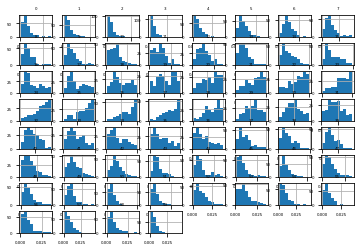

In [13]:
import matplotlib.pyplot as plt

fig = df.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

#Fit & evaluate raw-data using k-nearest neighbor 

In [27]:
# evaluate knn on the raw sonar dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# load dataset
df = read_csv('sonar', header=None)
array = df.values

#seaparate into input and output columns
X, y = array[:, :-1], array[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

#define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.797 (0.073)


# Box-Cox Power Transform example

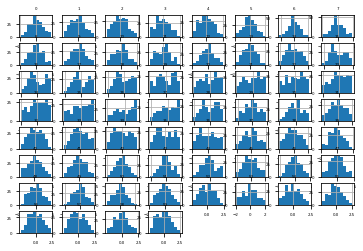

In [42]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv('sonar.csv', header=None)

# retrieve just the numeric input values
array = df.values[:, :-1]

# perform a box-cox transform of the data array
scaler = MinMaxScaler(feature_range=(1,2)) # make certain all values > 0
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
array = pipeline.fit_transform(array)

# covert array back to dataframe
df2 = pd.DataFrame(array)

# histograms of variables
fig = df2.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

#show plot
plt.show()
